In [1]:
import sys
import os
import matplotlib.pyplot as plt

project_path = r"D:\10x\Projects\Telecom-Customer-Behavior-and-Engagement-Insights"
if project_path not in sys.path:
    sys.path.append(project_path)


In [12]:
from scripts import TelecomAnalysis
from scripts.data_cleaning import (
    detect_outliers,
    handle_missing_values,
    standardize_column_names,
    handle_missing_values_in_columns,
    retain_relevant_columns,
    add_total_data_volume
)



- **Database Setup**:
  - `database`: Name (`telecom`)
  - `password`: Password (`password`)
  - `table_name`: Table to analyze (`xdr_data`)

- **Steps**:
  1. **Initialize**: Create `TelecomAnalysis` instance.
  2. **Load Data**: `analysis.load_data()`
  3. **Explore Data**: `analysis.explore_data()`

Quickly sets up, loads, and explores telecom data for analysis.

In [3]:
database = "telecom"
password = "password"
table_name = "xdr_data"
analysis = TelecomAnalysis(database=database, password=password, table_name=table_name)
# Step 1: Load the data
data = analysis.load_data()


Data loaded successfully!


## Dataset Documentation

This dataset contains detailed network and device performance information. Below are the descriptions for each column:

## Column Descriptions
1. **Bearer Id**: Unique identifier for a network bearer (channel or medium for data transmission).
2. **Start**: Starting date of the data session.
3. **Start ms**: Starting time of the session in milliseconds.
4. **End**: Ending date of the session.
5. **End ms**: Ending time of the session in milliseconds.
6. **Dur. (ms)**: Duration of the session in milliseconds.
7. **IMSI**: International Mobile Subscriber Identity, uniquely identifying a mobile user.
8. **MSISDN/Number**: User's phone number (Mobile Station International Subscriber Directory Number).
9. **IMEI**: International Mobile Equipment Identity, a unique device identifier.
10. **Last Location Name**: Name of the location where the device was last connected.

## Network Performance Metrics
11. **Avg RTT DL (ms)**: Average Round Trip Time for downloads (ms).
12. **Avg RTT UL (ms)**: Average Round Trip Time for uploads (ms).
13. **Avg Bearer TP DL (kbps)**: Average data throughput for downloads (kbps).
14. **Avg Bearer TP UL (kbps)**: Average data throughput for uploads (kbps).
15. **TCP DL Retrans. Vol (Bytes)**: Data retransmitted during downloads (bytes).
16. **TCP UL Retrans. Vol (Bytes)**: Data retransmitted during uploads (bytes).

## Data Throughput Categories
17. **DL TP < 50 Kbps (%)**: Percentage of download throughput below 50 kbps.
18. **50 Kbps < DL TP < 250 Kbps (%)**: Percentage of download throughput between 50-250 kbps.
19. **250 Kbps < DL TP < 1 Mbps (%)**: Percentage of download throughput between 250 kbps-1 Mbps.
20. **DL TP > 1 Mbps (%)**: Percentage of download throughput above 1 Mbps.
21. **UL TP < 10 Kbps (%)**: Percentage of upload throughput below 10 kbps.
22. **10 Kbps < UL TP < 50 Kbps (%)**: Percentage of upload throughput between 10-50 kbps.
23. **50 Kbps < UL TP < 300 Kbps (%)**: Percentage of upload throughput between 50-300 kbps.
24. **UL TP > 300 Kbps (%)**: Percentage of upload throughput above 300 kbps.

## Application-specific Traffic
25. **HTTP DL (Bytes)**: Volume of HTTP downloads (bytes).
26. **HTTP UL (Bytes)**: Volume of HTTP uploads (bytes).
27. **Activity Duration DL (ms)**: Active download duration (ms).
28. **Activity Duration UL (ms)**: Active upload duration (ms).

## Device Information
29. **Handset Manufacturer**: Device manufacturer (e.g., Samsung).
30. **Handset Type**: Specific device model.

## Traffic Volume Categories
31. **Nb of sec with 125000B < Vol DL**: Seconds with download volume > 125,000 bytes.
32. **Nb of sec with 1250B < Vol UL < 6250B**: Seconds with upload volume between 1,250-6,250 bytes.
33. **Nb of sec with 31250B < Vol DL < 125000B**: Seconds with download volume between 31,250-125,000 bytes.
34. **Nb of sec with 37500B < Vol UL**: Seconds with upload volume > 37,500 bytes.
35. **Nb of sec with 6250B < Vol DL < 31250B**: Seconds with download volume between 6,250-31,250 bytes.
36. **Nb of sec with 6250B < Vol UL < 37500B**: Seconds with upload volume between 6,250-37,500 bytes.

## Application-specific Data
37. **Social Media DL (Bytes)**: Data downloaded via social media (bytes).
38. **Social Media UL (Bytes)**: Data uploaded via social media (bytes).
39. **Google DL (Bytes)**: Data downloaded from Google services (bytes).
40. **Google UL (Bytes)**: Data uploaded to Google services (bytes).
41. **Email DL (Bytes)**: Data downloaded for email (bytes).
42. **Email UL (Bytes)**: Data uploaded for email (bytes).
43. **YouTube DL (Bytes)**: Data downloaded via YouTube (bytes).
44. **YouTube UL (Bytes)**: Data uploaded to YouTube (bytes).
45. **Netflix DL (Bytes)**: Data downloaded via Netflix (bytes).
46. **Netflix UL (Bytes)**: Data uploaded to Netflix (bytes).
47. **Gaming DL (Bytes)**: Data downloaded for online gaming (bytes).
48. **Gaming UL (Bytes)**: Data uploaded for online gaming (bytes).
49. **Other DL (Bytes)**: Data downloaded for other purposes (bytes).
50. **Other UL (Bytes)**: Data uploaded for other purposes (bytes).

## Total Traffic
51. **Total UL (Bytes)**: Total upload volume (bytes).
52. **Total DL (Bytes)**: Total download volume (bytes).


# Basic Data cleaning start here

In [4]:
# Step 2: Standardize column names
data = standardize_column_names(data)

Column names standardized.


In [5]:
# Step 2: Explore the dataset
analysis.explore_data()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600004 entries, 0 to 600003
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   bearer_id                                 596040 non-null  float64
 1   start                                     600000 non-null  object 
 2   start_ms                                  600000 non-null  float64
 3   end                                       600000 non-null  object 
 4   end_ms                                    600000 non-null  float64
 5   dur._(ms)                                 600000 non-null  float64
 6   imsi                                      597724 non-null  float64
 7   msisdn/number                             595740 non-null  float64
 8   imei                                      597716 non-null  float64
 9   last_location_name                        595392 non-null  object 
 10  avg_r

# Managing  Duplicates

In [8]:
# Step 3: Handle missing values in critical columns
critical_columns=["dur._(ms)", "total_dl_(bytes)", "total_ul_(bytes)"]
data = handle_missing_values_in_columns(data, strategy="mean", columns=critical_columns)
print("Missing values handled.")


Missing values handled.


In [9]:
# Remove outliers from critical columns
outlier_columns = ["dur._(ms)", "total_dl_(bytes)", "total_ul_(bytes)"]
data = detect_outliers(data, columns=outlier_columns)
print("Outliers removed.")


Outliers in dur._(ms): 28736

Outliers in total_dl_(bytes): 0

Outliers in total_ul_(bytes): 972
Outliers removed.


In [11]:
columns_to_keep = [
    "msisdn/number",        # User identifier
    "dur._(ms)",            # Session duration
    "total_dl_(bytes)",     # Total download data volume
    "total_ul_(bytes)",     # Total upload data volume
    "social_media_dl_(bytes)", "social_media_ul_(bytes)",  # Social media DL/UL
    "google_dl_(bytes)", "google_ul_(bytes)",              # Google DL/UL
    "youtube_dl_(bytes)", "youtube_ul_(bytes)",            # YouTube DL/UL
    "netflix_dl_(bytes)", "netflix_ul_(bytes)",            # Netflix DL/UL
    "gaming_dl_(bytes)", "gaming_ul_(bytes)",              # Gaming DL/UL
    "other_dl_(bytes)", "other_ul_(bytes)"                # Other DL/UL
]
data = retain_relevant_columns(data, columns=columns_to_keep)
print("Relevant columns retained:")
print(data.columns)

Relevant columns retained:
Index(['msisdn/number', 'dur._(ms)', 'total_dl_(bytes)', 'total_ul_(bytes)',
       'social_media_dl_(bytes)', 'social_media_ul_(bytes)',
       'google_dl_(bytes)', 'google_ul_(bytes)', 'youtube_dl_(bytes)',
       'youtube_ul_(bytes)', 'netflix_dl_(bytes)', 'netflix_ul_(bytes)',
       'gaming_dl_(bytes)', 'gaming_ul_(bytes)', 'other_dl_(bytes)',
       'other_ul_(bytes)'],
      dtype='object')


In [14]:
# Add a column for total data volume
data = add_total_data_volume(data, dl_column="total_dl_(bytes)", ul_column="total_ul_(bytes)")
print("Total data volume column added:")
print(data.head())

Total data volume column added:
      msisdn/number  dur._(ms)  total_dl_(bytes)  total_ul_(bytes)  \
5924   3.361489e+10   870812.0       351280178.0        36919113.0   
6452   3.376054e+10   892685.0       638755886.0        35876562.0   
6623   3.366045e+10   705090.0        82403925.0        26474422.0   
6949   3.366045e+10   609798.0       202000756.0        56682886.0   
7443   3.366593e+10   643920.0       270226795.0        34805006.0   

      social_media_dl_(bytes)  social_media_ul_(bytes)  google_dl_(bytes)  \
5924                 219550.0                  36315.0         10257372.0   
6452                3429380.0                  53747.0         10142370.0   
6623                3471886.0                  17899.0          1542870.0   
6949                2610331.0                  29245.0          4644482.0   
7443                 716646.0                  33261.0          5512226.0   

      google_ul_(bytes)  youtube_dl_(bytes)  youtube_ul_(bytes)  \
5924          126

# Handle missing values (strategy: 'mean', 'median', or 'drop')

In [6]:
# Check for missing values in the dataset
missing_values_summary = data.isnull().sum()

# Display only columns with missing values
missing_values_summary = missing_values_summary[missing_values_summary > 0]

print("Missing Values Summary:")
print(missing_values_summary)

Missing Values Summary:
Bearer Id                                     3964
Start                                            4
Start ms                                         4
End                                              4
End ms                                           4
Dur. (ms)                                        4
IMSI                                          2280
MSISDN/Number                                 4264
IMEI                                          2288
Last Location Name                            4612
Avg RTT DL (ms)                             111316
Avg RTT UL (ms)                             111248
Avg Bearer TP DL (kbps)                          4
Avg Bearer TP UL (kbps)                          4
TCP DL Retrans. Vol (Bytes)                 352584
TCP UL Retrans. Vol (Bytes)                 386596
DL TP < 50 Kbps (%)                           3016
50 Kbps < DL TP < 250 Kbps (%)                3016
250 Kbps < DL TP < 1 Mbps (%)                 3016
DL TP >

##  Before handling Missing Value Let's see the distribution of the df

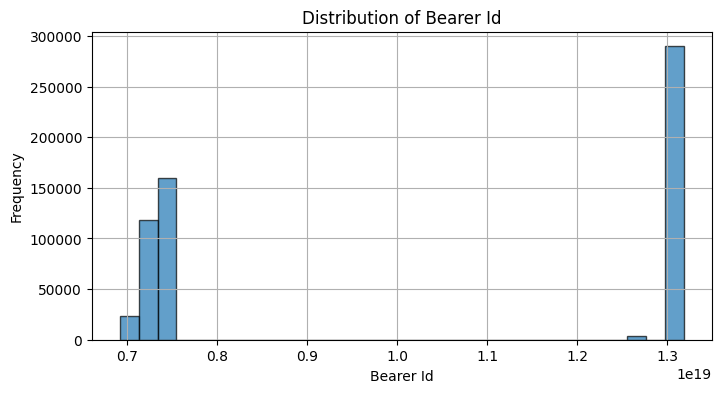

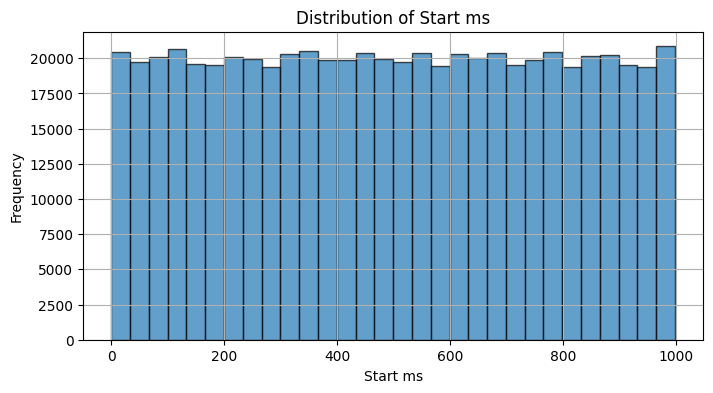

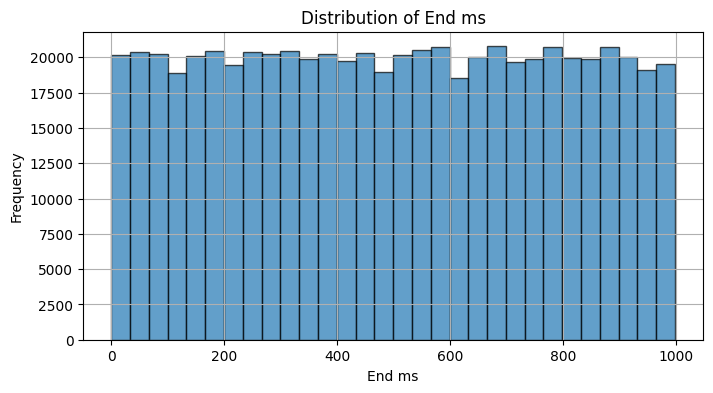

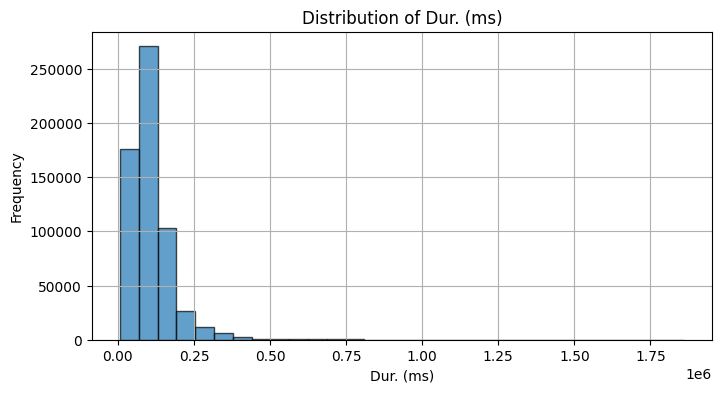

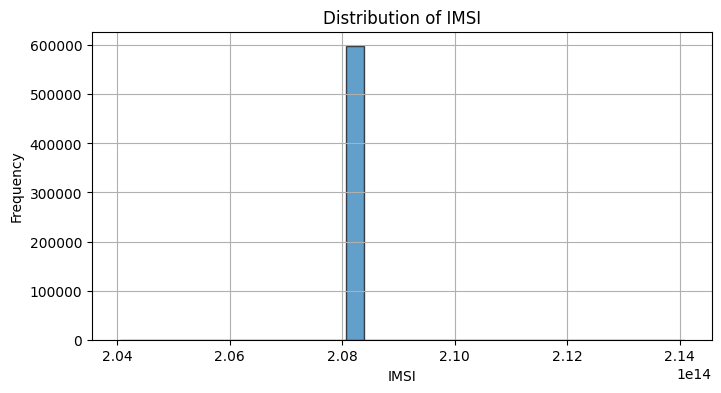

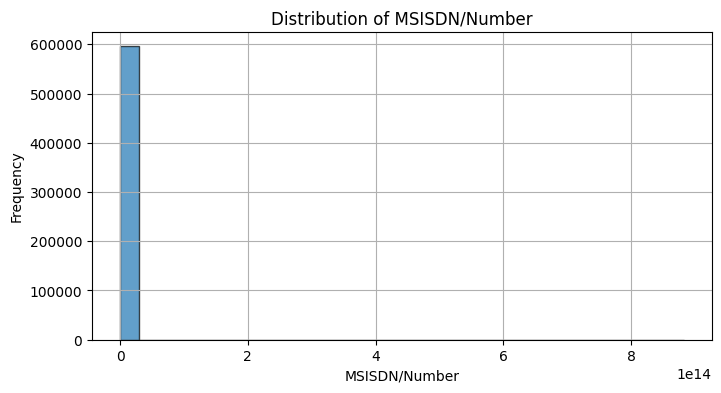

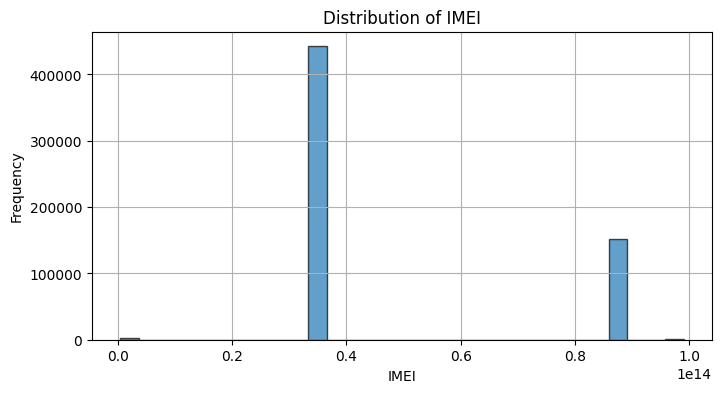

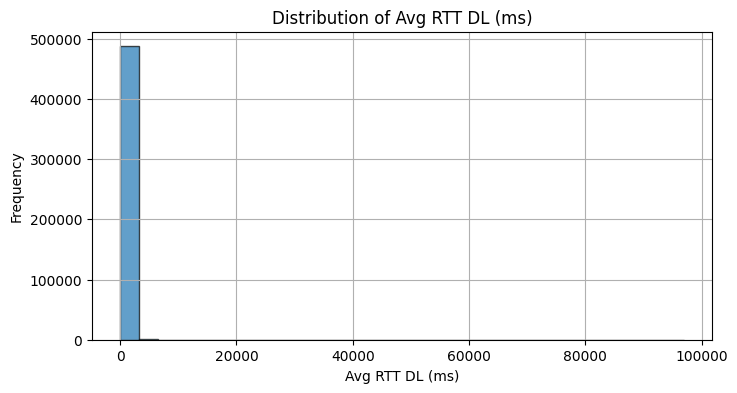

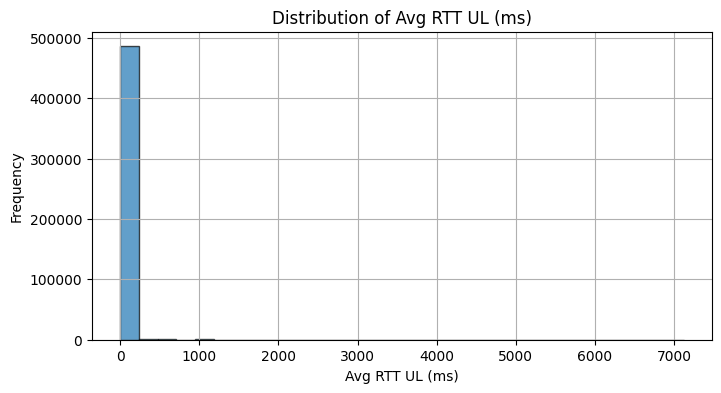

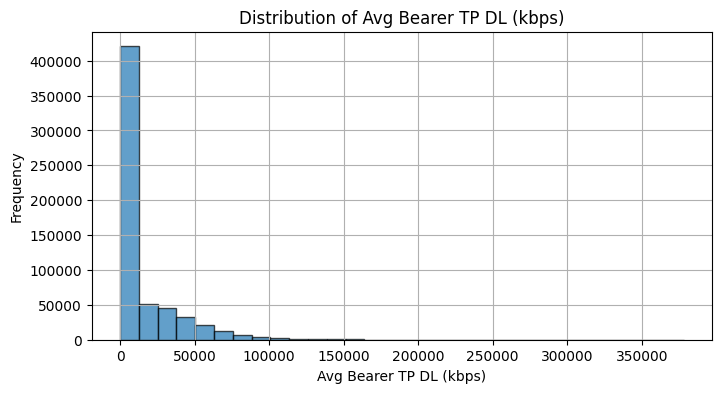

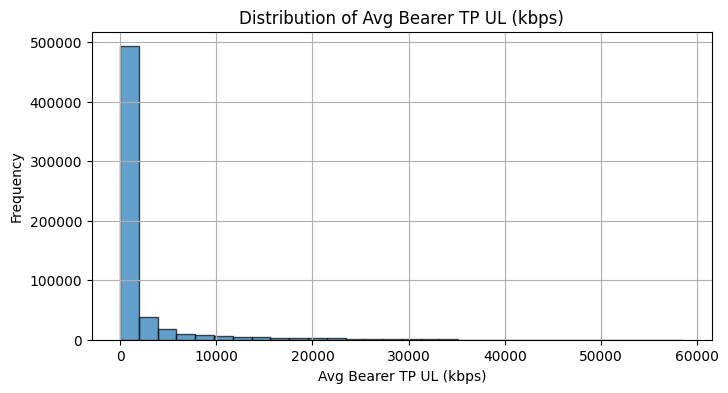

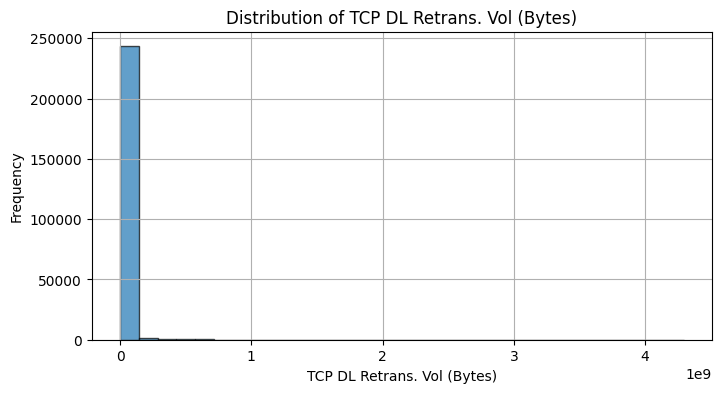

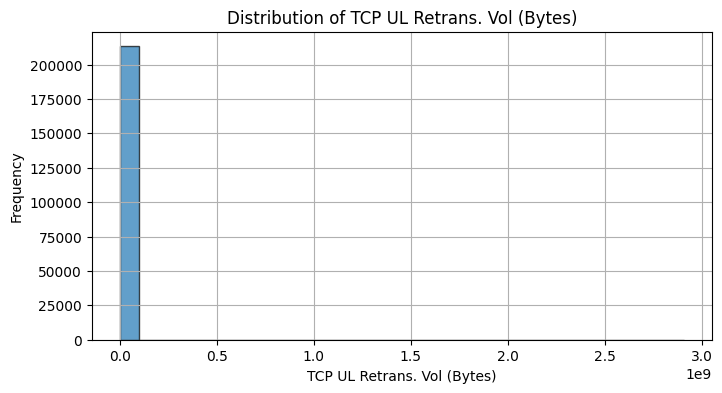

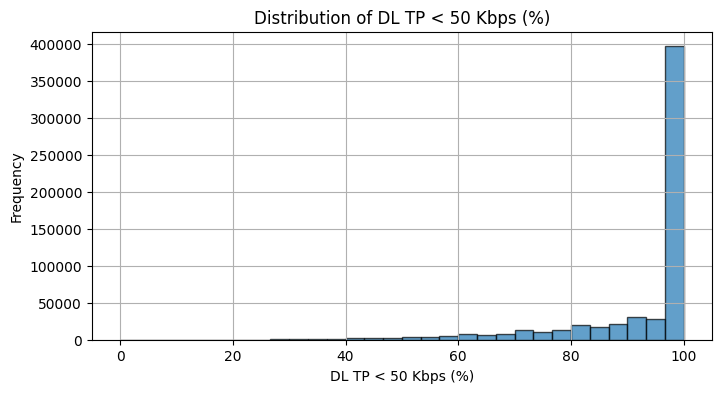

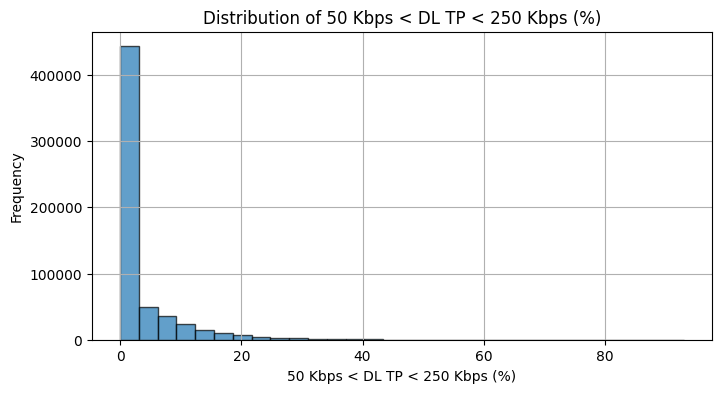

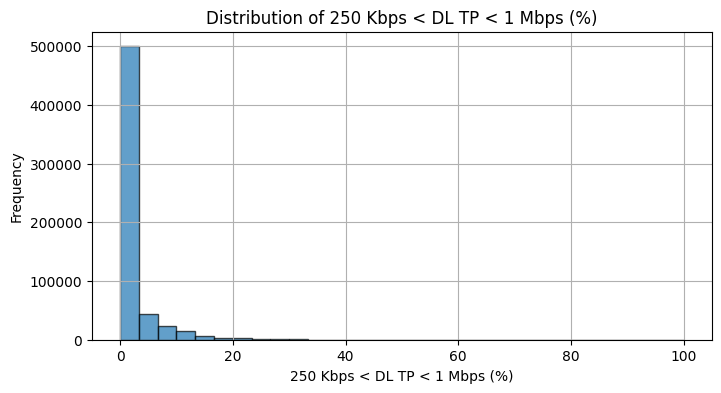

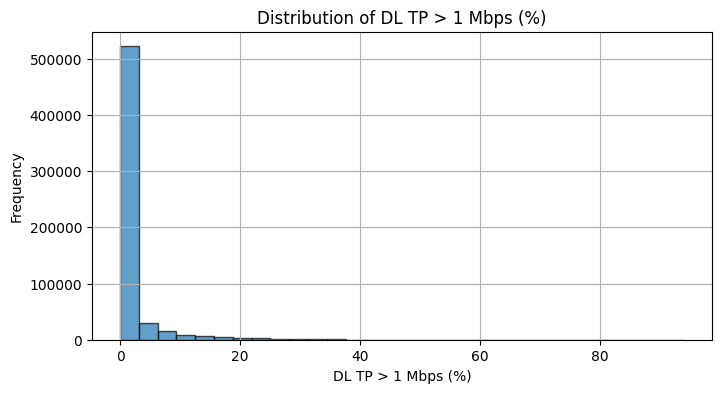

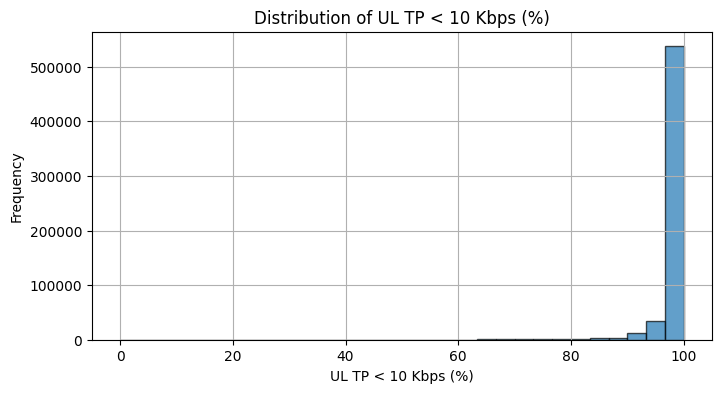

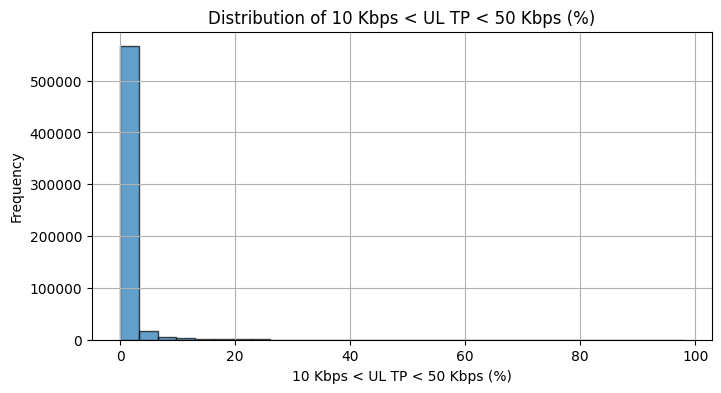

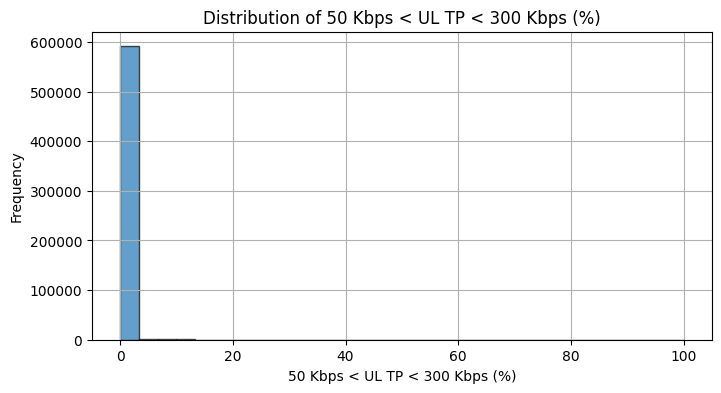

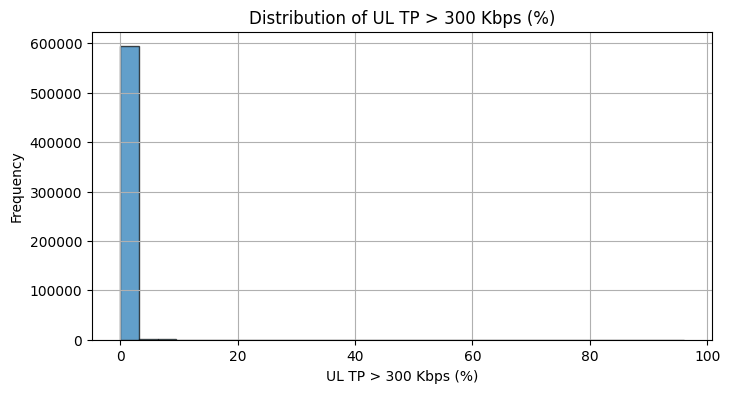

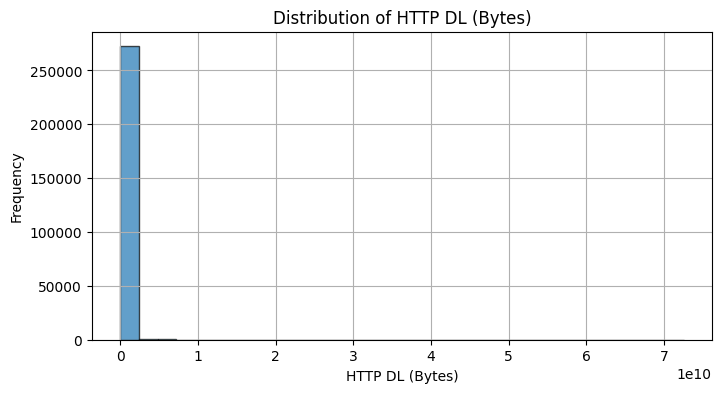

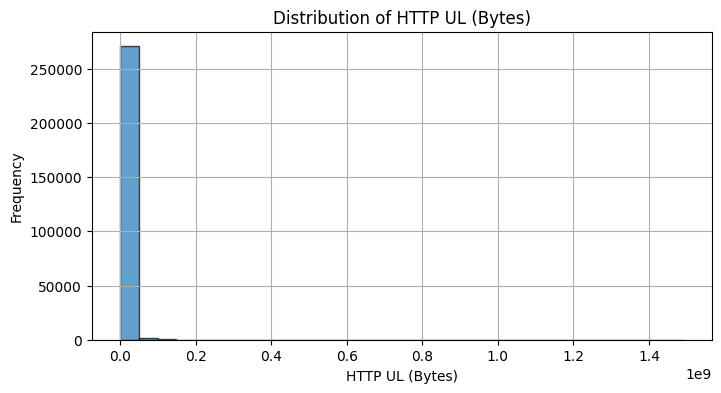

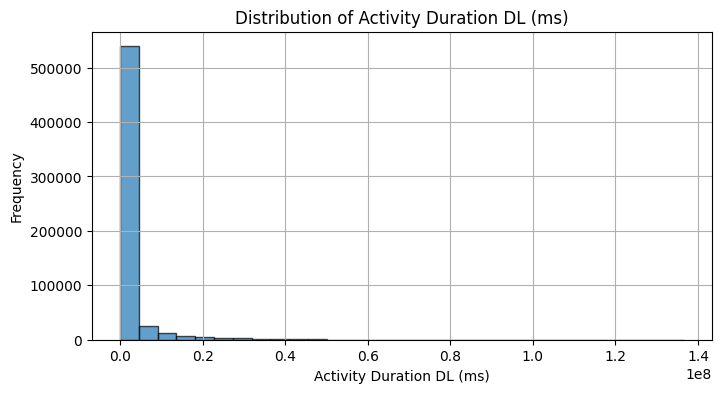

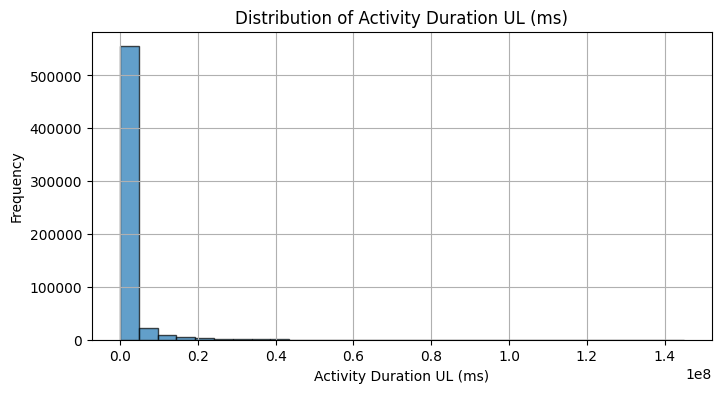

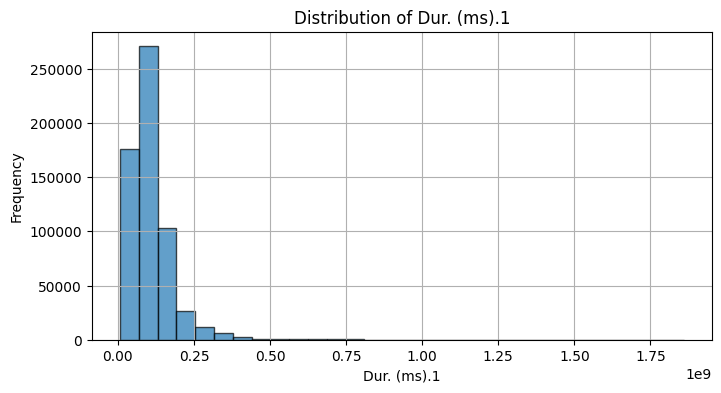

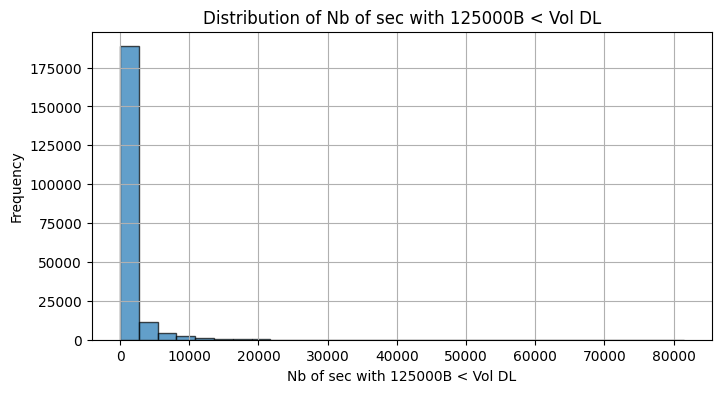

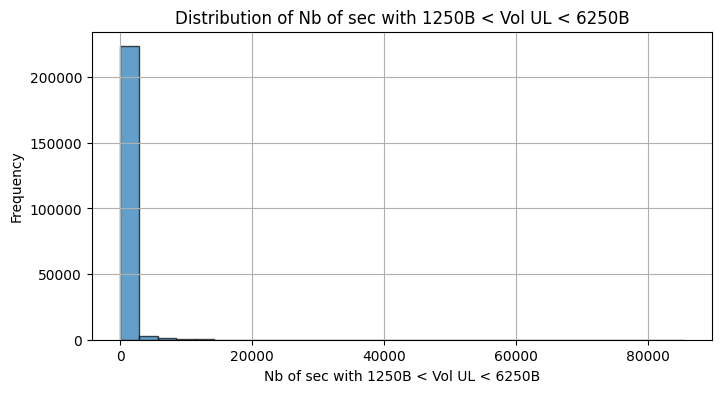

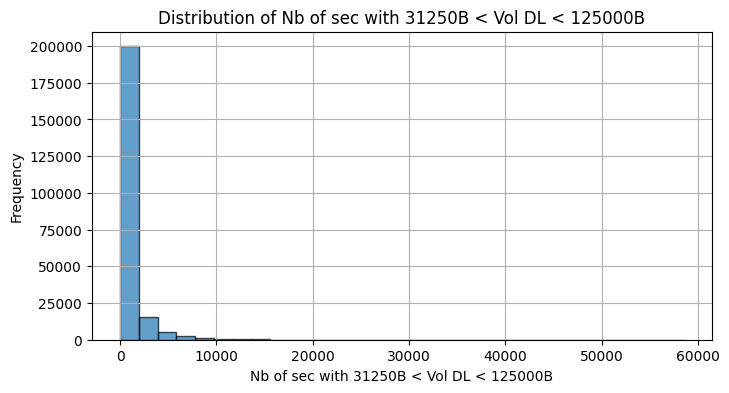

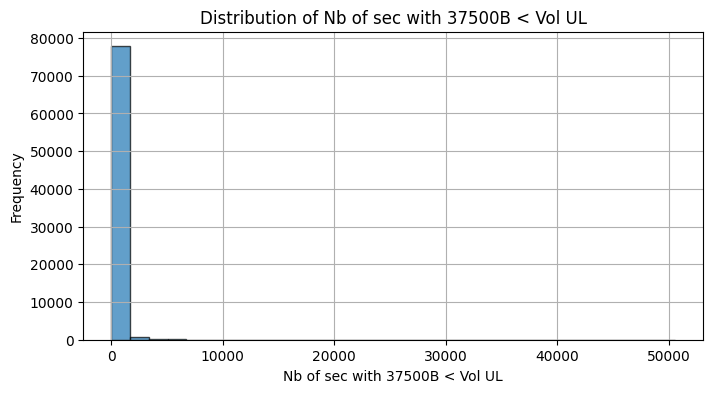

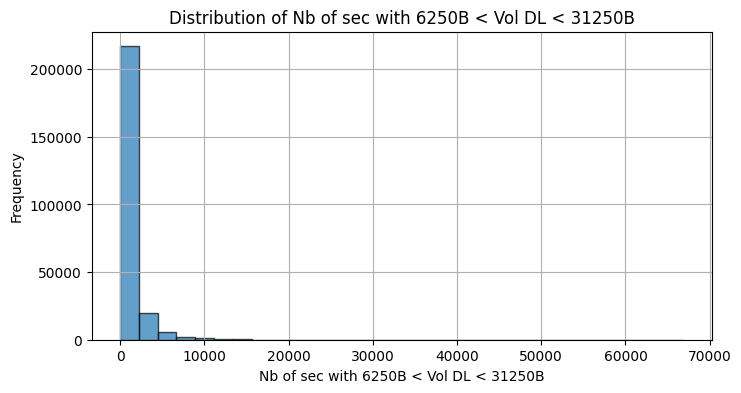

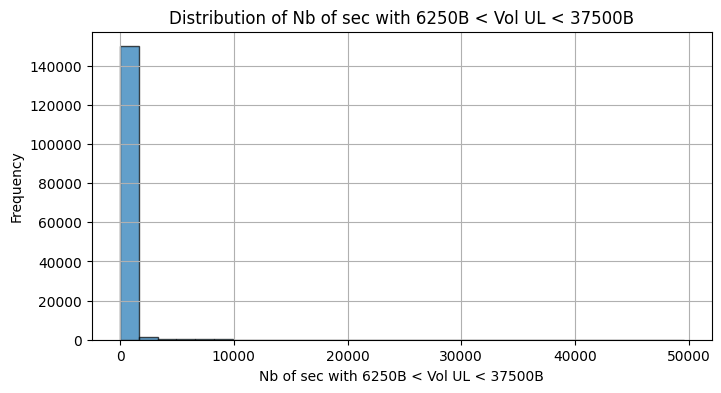

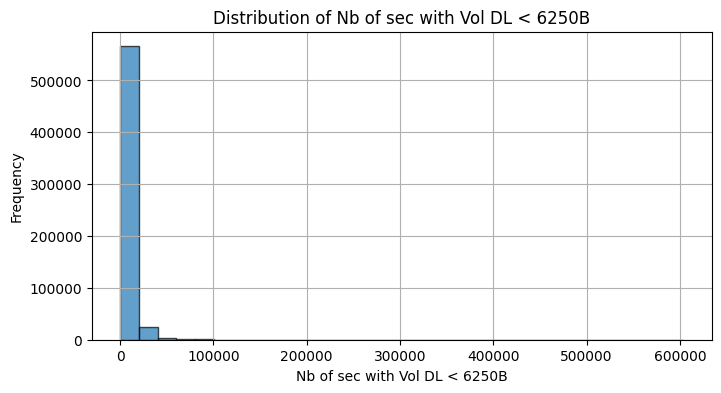

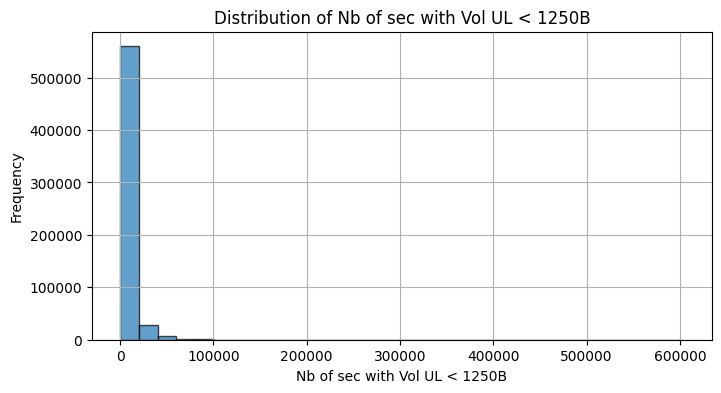

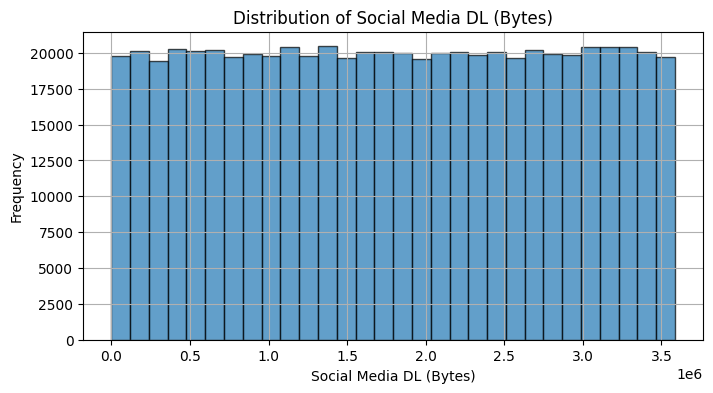

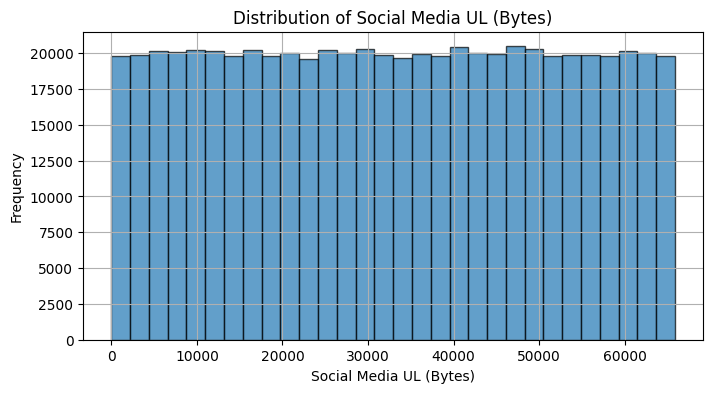

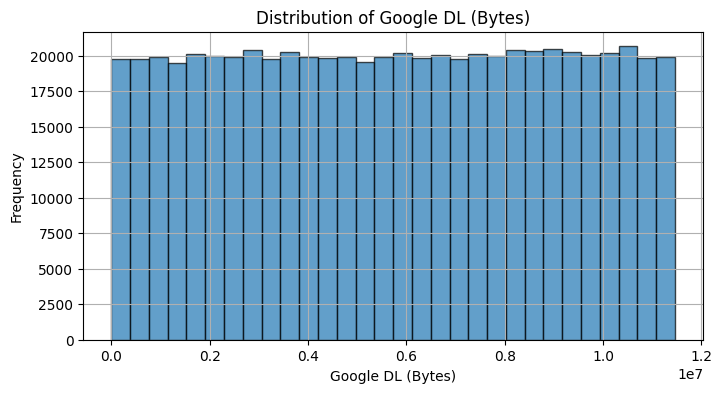

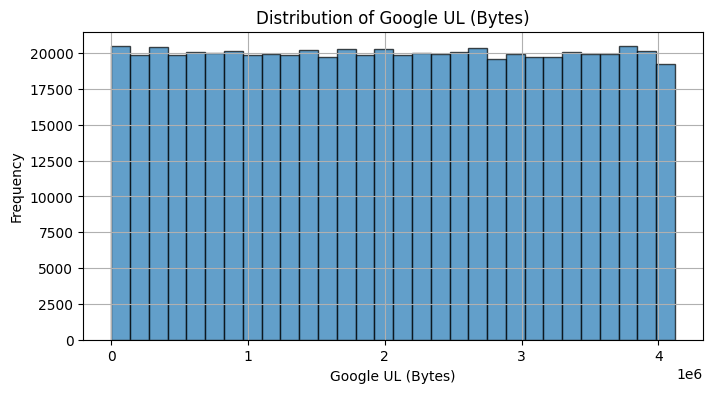

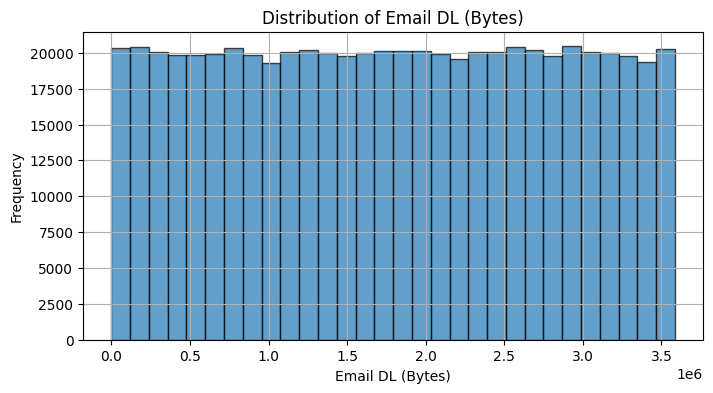

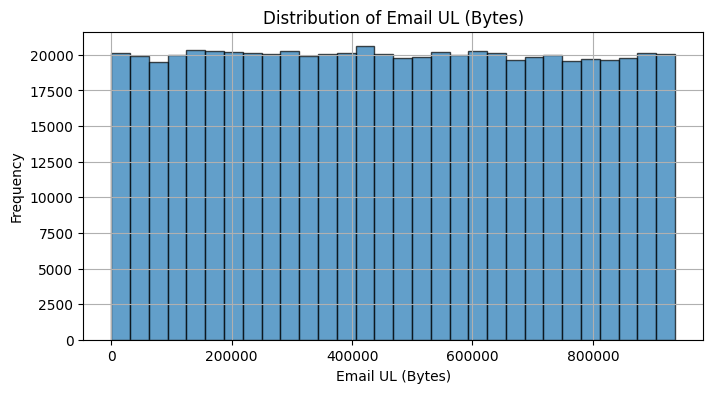

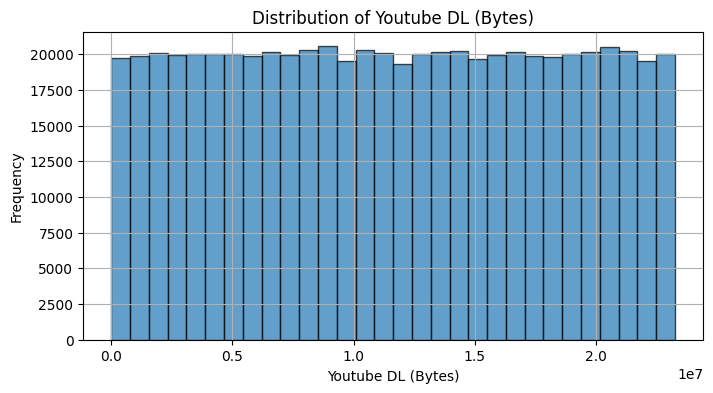

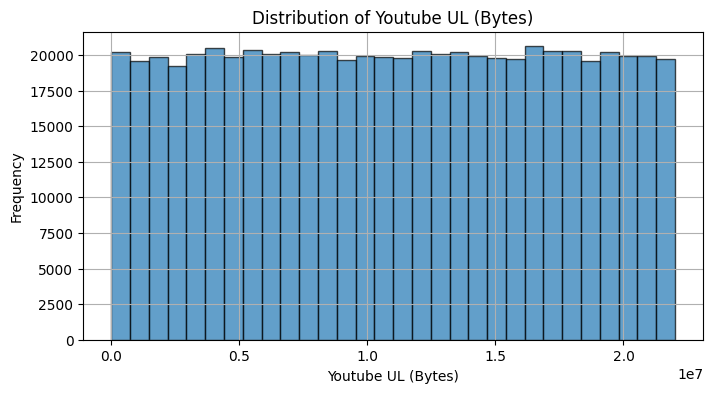

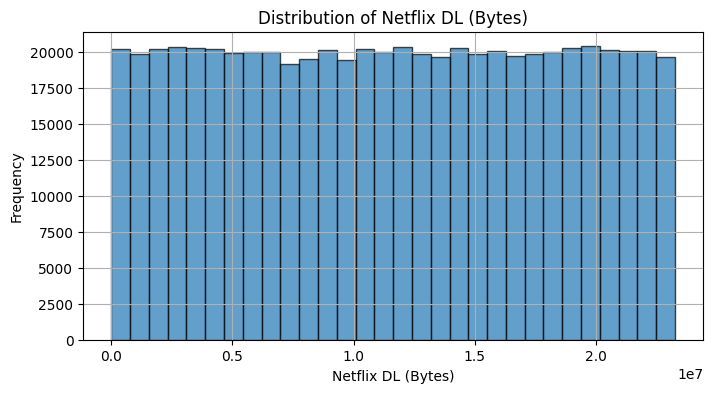

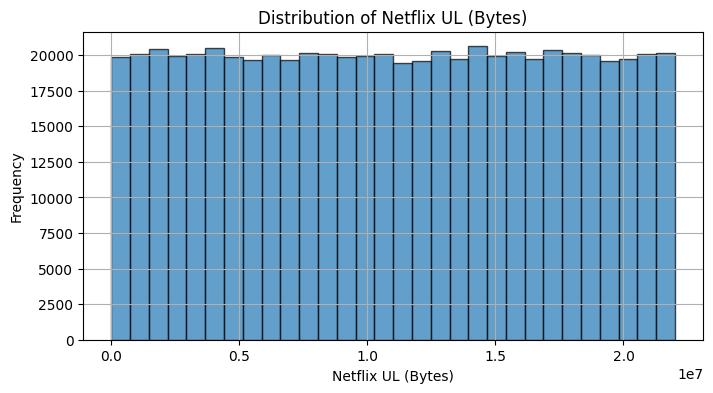

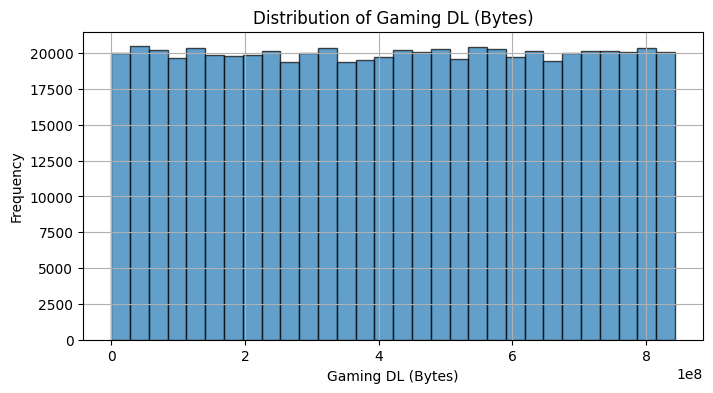

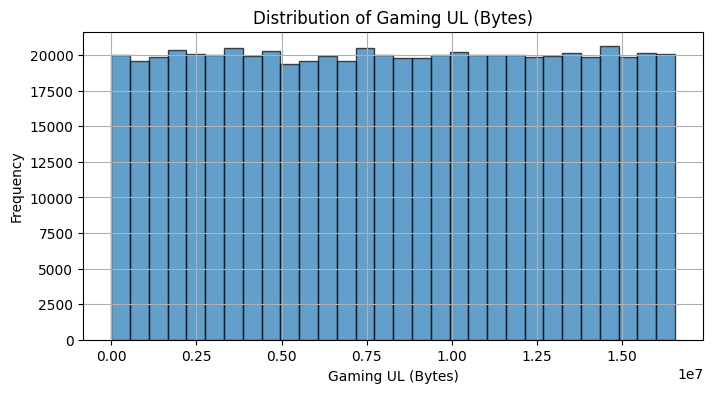

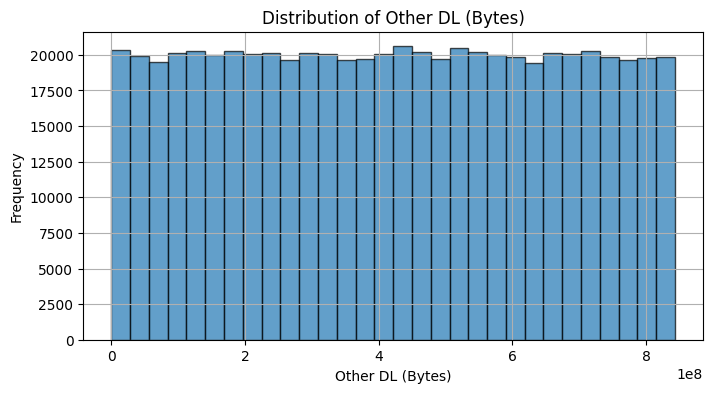

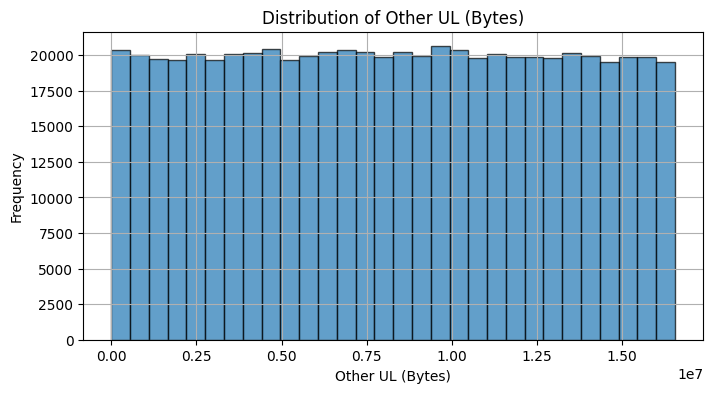

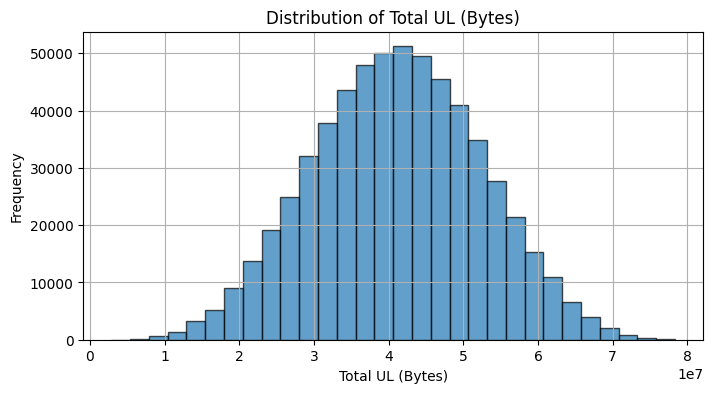

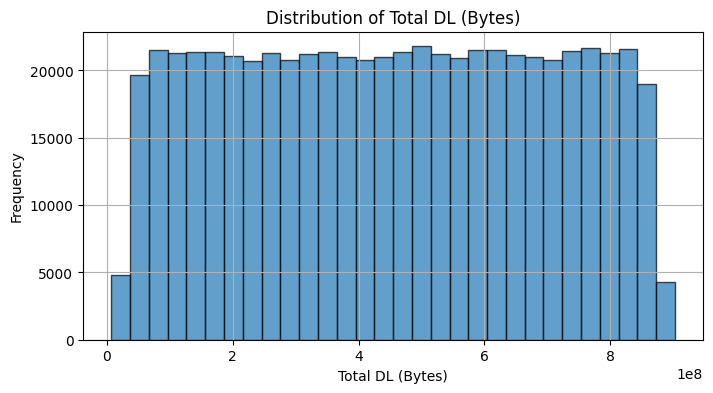

In [7]:

numeric_columns = data.select_dtypes(include=['number']).columns

# Plot histograms for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(data[column].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

In [8]:
columns = [
    'Start ms', 'End ms', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)',
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)'
]

# Call the function with the cleaned column list
# data = handle_missing_values(data, strategy="mean", columns=columns)

In [10]:
# Identify missing columns
missing_columns = [col for col in columns if col not in data.columns]
if missing_columns:
    print("Missing columns:", missing_columns)

In [11]:
data = handle_missing_values(data, strategy="mean", columns=columns)

In [12]:
# Check for missing values in the dataset
missing_values_summary = data.isnull().sum()

# Display only columns with missing values
missing_values_summary = missing_values_summary[missing_values_summary > 0]

print("Missing Values Summary:")
print(missing_values_summary)

Missing Values Summary:
Bearer Id                                     3964
Start                                            4
End                                              4
Dur. (ms)                                        4
IMSI                                          2280
MSISDN/Number                                 4264
IMEI                                          2288
Last Location Name                            4612
Avg RTT DL (ms)                             111316
Avg RTT UL (ms)                             111248
Avg Bearer TP DL (kbps)                          4
Avg Bearer TP UL (kbps)                          4
TCP DL Retrans. Vol (Bytes)                 352584
TCP UL Retrans. Vol (Bytes)                 386596
DL TP < 50 Kbps (%)                           3016
50 Kbps < DL TP < 250 Kbps (%)                3016
250 Kbps < DL TP < 1 Mbps (%)                 3016
DL TP > 1 Mbps (%)                            3016
UL TP < 10 Kbps (%)                           3168
10 Kbps

# Outlier Managments

In [13]:
data = detect_outliers(data)


Outliers in Bearer Id: 0

Outliers in Start ms: 0

Outliers in End ms: 0

Outliers in Dur. (ms): 28736

Outliers in IMSI: 53000

Outliers in MSISDN/Number: 96508

Outliers in IMEI: 0

Outliers in Avg RTT DL (ms): 56236

Outliers in Avg RTT UL (ms): 44972

Outliers in Avg Bearer TP DL (kbps): 52936

Outliers in Avg Bearer TP UL (kbps): 86124

Outliers in TCP DL Retrans. Vol (Bytes): 35808

Outliers in TCP UL Retrans. Vol (Bytes): 29616

Outliers in DL TP < 50 Kbps (%): 73408

Outliers in 50 Kbps < DL TP < 250 Kbps (%): 60880

Outliers in 250 Kbps < DL TP < 1 Mbps (%): 119004

Outliers in DL TP > 1 Mbps (%): 148264

Outliers in UL TP < 10 Kbps (%): 88492

Outliers in 10 Kbps < UL TP < 50 Kbps (%): 127996

Outliers in 50 Kbps < UL TP < 300 Kbps (%): 18172

Outliers in UL TP > 300 Kbps (%): 9828

Outliers in HTTP DL (Bytes): 49488

Outliers in HTTP UL (Bytes): 41660

Outliers in Activity Duration DL (ms): 106636

Outliers in Activity Duration UL (ms): 104088

Outliers in Dur. (ms).1: 2873